In [2]:
population = 130000
num_days = 300
num_infected = 3
num_recovered = 0
num_susceptible = population - num_infected - num_recovered
prob_contact = 0.2
prob_recovery = 1/14

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
days = np.array(range(num_days))
sir_data = np.zeros((num_days, 3))

In [5]:
for index in range(num_days):
    new_recoveries = num_infected * prob_recovery
    new_infections = prob_contact * (num_infected/population) * num_susceptible
    num_recovered = num_recovered + new_recoveries
    if num_recovered > population: 
        num_recovered = population
    num_infected = num_infected + new_infections - new_recoveries
    num_susceptible = population - num_recovered - num_infected
    sir_data[index, :] = [num_susceptible, num_infected, num_recovered]
    

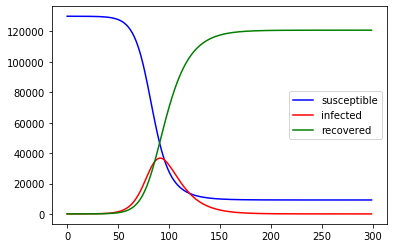

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(days, sir_data[:,0], 'b', label = 'susceptible')
ax.plot(days, sir_data[:,1], 'r', label = 'infected')
ax.plot(days, sir_data[:,2], 'g', label = 'recovered')
ax.set_xlabel("Days")
ax.set_ylabel("Number of People")
legend = ax.legend()
plt.show()
